### Various impact models: 

Impact is a nonlinear process. There will be some impact for trading $100 in a market in the price of the asset (measured in basis points). There is more impact for trading $1000, and even more for trading $100,000. 

A linear impact model would suggest that impact grows proportional to dollars traded. However, that isn't a good model for real trading. At some point, crossing the spread again and again will deviate the price of the asset so much that other will trade the other direction. A logistic curve can model this theory. 

Empirically, trading costs are more linear than a logistic model supposes. We can model this with a **convolution**: if there is disagreement about the "true fair" of an asset, the impact curve will end up looking like the amalgamation of a lot of different logistic distributions with different fairs. For example, instead of everyone agreeing that Apple is worth $100, it might be that
- Most people think Apple is worth $100
- Some people think Apple is actually worth $101, but less people than those that think it's worth $100
- Some people think Apple is worth $99...
And so on, to make a normal distribution. 

With a logistic model, if you "kick the price" by crossing spread and trading, there are a lot of changes in the short term, but it levels off. 
If there is disagreement about fair, the impact stays linear for a lot longer. This is represented by the linear-logistic convolution, which matches empirical trading better. 

Below, this convolution is approximated with FFT.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

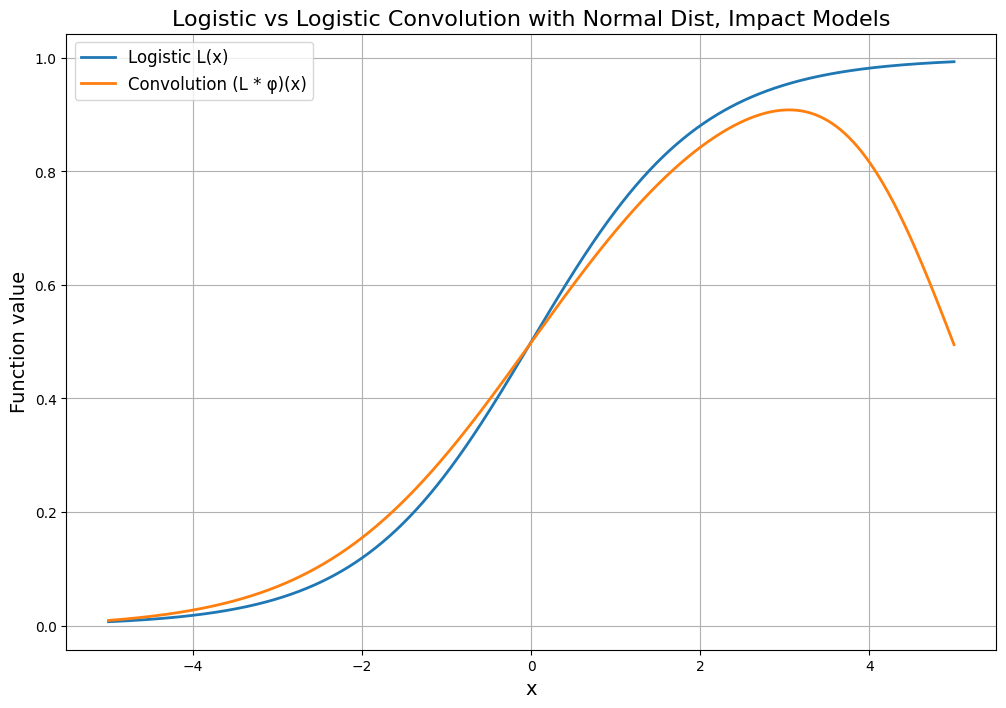

In [7]:
# Set up the x-domain
x = np.linspace(-5, 5, 1000)
dx = x[1] - x[0]  # spacing

# 1. Standard logistic function: L(x) = 1/(1+e^{-x})
L = 1 / (1 + np.exp(-x))

# 2. Normal pdf with mean 0 and standard deviation sigma.
sigma = 1.0
phi = 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-x**2 / (2 * sigma**2))

# 2. Convolution of the logistic function with the normal pdf:
# The convolution (L * phi)(x) is given by:
#     (L * phi)(x) = ∫ L(x-t) φ(t) dt.
# We approximate this convolution using FFT-based convolution (ChatGPT suggested, lmk if you have issues with this)
conv = fftconvolve(L, phi, mode='same') * dx  # multiply by dx to approximate the integral

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(x, L, label='Logistic L(x)', linewidth=2)
plt.plot(x, conv, label='Convolution (L * φ)(x)', linewidth=2)
plt.xlabel('x', fontsize=14)
plt.ylabel('Function value', fontsize=14)
plt.title('Logistic vs Logistic Convolution with Normal Dist, Impact Models', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
